<a href="https://colab.research.google.com/github/FDASFASDGASG/FDASFASDGASG/blob/main/Ai_tuan_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=beca5a5f2bbcda2e786e0be01f1ec87011ccfa26aca61a7ad21811e22afa15ad
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np

In [3]:
import skfuzzy as fuzz

In [4]:
import matplotlib.pyplot as plt


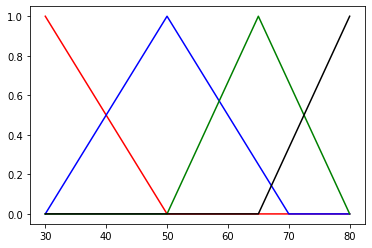

In [5]:
x = np.arange(30, 81, 1)
slow = fuzz.trimf(x,[30,30,50])
medium = fuzz.trimf(x,[30,50,70])
medium_fast = fuzz.trimf(x,[50,65,80])
full_speed = fuzz.trimf(x,[65,80,80])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='SLOW')
plt.plot(x,medium,'b',linewidth=1.5,label='MEDIUM')
plt.plot(x,medium_fast,'g',linewidth=1.5,label='MEDIUM_FAST')
plt.plot(x,full_speed,'black',linewidth=1.5,label='FULL_SPEED')

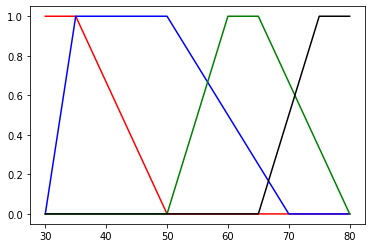

In [6]:
x = np.arange(30, 81, 1)
slow1 = fuzz.trapmf(x,[30,30,35,50])
medium1 = fuzz.trapmf(x,[30,35,50,70])
medium_fast1 = fuzz.trapmf(x,[50,60,65,80])
full_speed1 = fuzz.trapmf(x,[65,75,80,80])
plt.figure()
plt.plot(x,slow1,'r',linewidth=1.5,label='SLOW1')
plt.plot(x,medium1,'b',linewidth=1.5,label='MEDIUM1')
plt.plot(x,medium_fast1,'g',linewidth=1.5,label='MEDIUM_FAST1')
plt.plot(x,full_speed1,'black',linewidth=1.5,label='FULL_SPEED1')

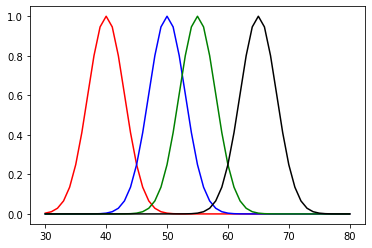

In [7]:
x = np.arange(30, 81, 1)
slow1 = fuzz.gaussmf(x,40,3)
medium1 = fuzz.gaussmf(x,50,3)
medium_fast1 = fuzz.gaussmf(x,55,3)
full_speed1 = fuzz.gaussmf(x,65,3)
plt.figure()
plt.plot(x,slow1,'r',linewidth=1.5,label='SLOW1')
plt.plot(x,medium1,'b',linewidth=1.5,label='MEDIUM1')
plt.plot(x,medium_fast1,'g',linewidth=1.5,label='MEDIUM_FAST1')
plt.plot(x,full_speed1,'black',linewidth=1.5,label='FULL_SPEED1')

22.64444444444445


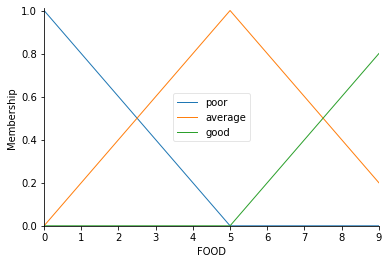

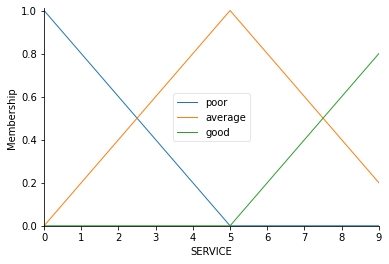

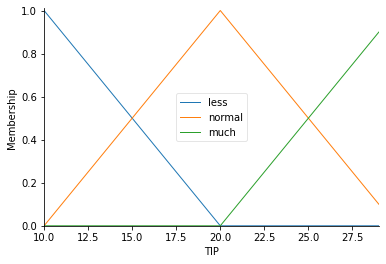

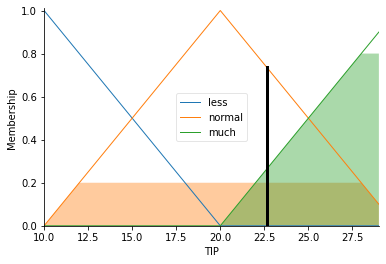

In [8]:
from traitlets.traitlets import TraitType
from IPython.lib.display import TextDisplayObject
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,10,1),'FOOD')
service = ctrl.Antecedent(np.arange(0,10,1),'SERVICE')
tip = ctrl.Consequent(np.arange(10,30,1),'TIP')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['normal']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])
 
food.view()
service.view()
tip.view()
rule1=ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2=ctrl.Rule(food['average']&service['poor'],tip['less'])
rule3=ctrl.Rule(food['good']&service['poor'],tip['normal'])
rule4=ctrl.Rule(food['poor']&service['average'],tip['less'])
rule5=ctrl.Rule(food['average']&service['average'],tip['normal'])
rule6=ctrl.Rule(food['good']&service['average'],tip['normal'])
rule7=ctrl.Rule(food['poor']&service['good'],tip['normal'])
rule8=ctrl.Rule(food['average']&service['good'],tip['much'])
rule9=ctrl.Rule(food['good']&service['good'],tip['much'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['FOOD']=9
tipping.input['SERVICE']=10
tipping.compute()
print(tipping.output['TIP'])
tip.view(sim=tipping)



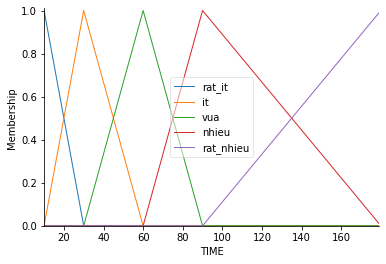

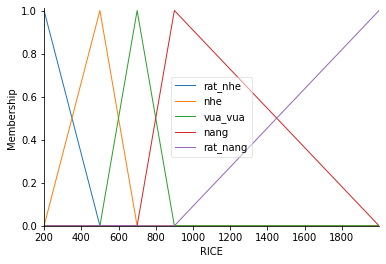

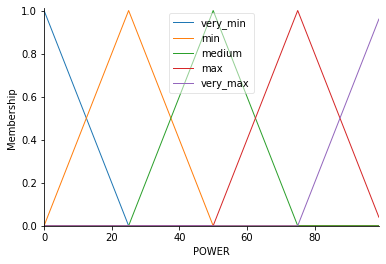

In [ ]:
from traitlets.traitlets import TraitType
from IPython.lib.display import TextDisplayObject
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,180,1),'TIME')
rice = ctrl.Antecedent(np.arange(200,2000,1),'RICE')
power = ctrl.Consequent(np.arange(0,100,1),'POWER')
time['rat_it']=fuzz.trimf(time.universe,[10,10,30])
time['it']=fuzz.trimf(time.universe,[10,30,60])
time['vua']=fuzz.trimf(time.universe,[30,60,90])
time['nhieu']=fuzz.trimf(time.universe,[60,90,180])
time['rat_nhieu']=fuzz.trimf(time.universe,[90,180,180])

rice['rat_nhe']=fuzz.trimf(rice.universe,[200,200,500])
rice['nhe']=fuzz.trimf(rice.universe,[200,500,700])
rice['vua_vua']=fuzz.trimf(rice.universe,[500,700,900])
rice['nang']=fuzz.trimf(rice.universe,[700,900,2000])
rice['rat_nang']=fuzz.trimf(rice.universe,[900,2000,2000])

power['very_min']=fuzz.trimf(power.universe,[0,0,25])
power['min']=fuzz.trimf(power.universe,[0,25,50])
power['medium']=fuzz.trimf(power.universe,[25,50,75])
power['max']=fuzz.trimf(power.universe,[50,75,100])
power['very_max']=fuzz.trimf(power.universe,[75,100,100])


time.view()
rice.view()
power.view()
rule1=ctrl.Rule(time['rat_it']&rice['rat_nhe'],power['very_min'])
rule2=ctrl.Rule(time['it']&rice['rat_nhe'],power['min'])
rule3=ctrl.Rule(time['vua']&rice['rat_nhe'],power['min'])
rule4=ctrl.Rule(time['nhieu']&service['rat_nhe'],power['min'])
rule5=ctrl.Rule(time['rat_nhieu']&service['rat_nhe'],power['min'])







24.999999999999996


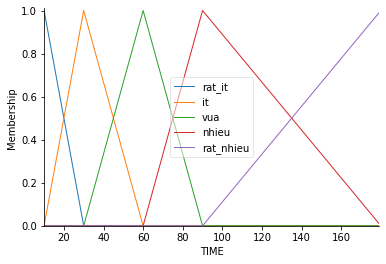

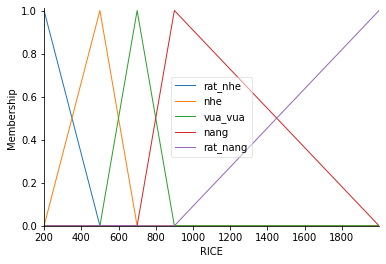

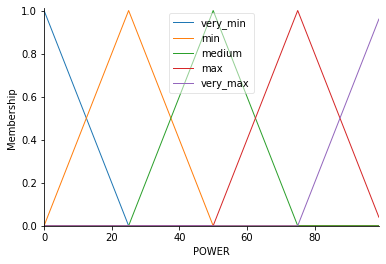

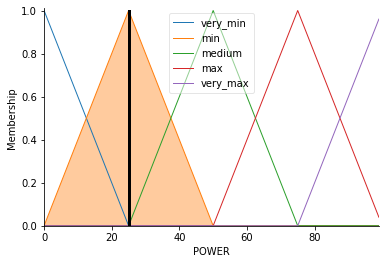

In [ ]:
from traitlets.traitlets import TraitType
from IPython.lib.display import TextDisplayObject
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,180,1),'TIME')
rice = ctrl.Antecedent(np.arange(200,2000,1),'RICE')
power = ctrl.Consequent(np.arange(0,100,1),'POWER')
time['rat_it']=fuzz.trimf(time.universe,[10,10,30])
time['it']=fuzz.trimf(time.universe,[10,30,60])
time['vua']=fuzz.trimf(time.universe,[30,60,90])
time['nhieu']=fuzz.trimf(time.universe,[60,90,180])
time['rat_nhieu']=fuzz.trimf(time.universe,[90,180,180])

rice['rat_nhe']=fuzz.trimf(rice.universe,[200,200,500])
rice['nhe']=fuzz.trimf(rice.universe,[200,500,700])
rice['vua_vua']=fuzz.trimf(rice.universe,[500,700,900])
rice['nang']=fuzz.trimf(rice.universe,[700,900,2000])
rice['rat_nang']=fuzz.trimf(rice.universe,[900,2000,2000])

power['very_min']=fuzz.trimf(power.universe,[0,0,25])
power['min']=fuzz.trimf(power.universe,[0,25,50])
power['medium']=fuzz.trimf(power.universe,[25,50,75])
power['max']=fuzz.trimf(power.universe,[50,75,100])
power['very_max']=fuzz.trimf(power.universe,[75,100,100])


time.view()
rice.view()
power.view()
rule1=ctrl.Rule(time['rat_it']&rice['rat_nhe'],power['very_min'])
rule2=ctrl.Rule(time['it']&rice['rat_nhe'],power['min'])
rule3=ctrl.Rule(time['vua']&rice['rat_nhe'],power['min'])
rule4=ctrl.Rule(time['nhieu']&rice['rat_nhe'],power['min'])
rule5=ctrl.Rule(time['rat_nhieu']&rice['rat_nhe'],power['min'])
rule6=ctrl.Rule(time['rat_it']&rice['nhe'],power['very_min'])
rule7=ctrl.Rule(time['it']&rice['nhe'],power['min'])
rule8=ctrl.Rule(time['vua']&rice['nhe'],power['medium'])
rule9=ctrl.Rule(time['nhieu']&rice['nhe'],power['medium'])
rule10=ctrl.Rule(time['rat_nhieu']&rice['nhe'],power['min'])
rule11=ctrl.Rule(time['rat_it']&rice['vua_vua'],power['max'])
rule12=ctrl.Rule(time['it']&rice['vua_vua'],power['max'])
rule13=ctrl.Rule(time['vua']&rice['vua_vua'],power['medium'])
rule14=ctrl.Rule(time['nhieu']&rice['vua_vua'],power['medium'])
rule15=ctrl.Rule(time['rat_nhieu']&rice['vua_vua'],power['min'])
rule16=ctrl.Rule(time['rat_it']&rice['nang'],power['very_max'])
rule17=ctrl.Rule(time['it']&rice['nang'],power['very_max'])
rule18=ctrl.Rule(time['vua']&rice['nang'],power['max'])
rule19=ctrl.Rule(time['nhieu']&rice['nang'],power['max'])
rule20=ctrl.Rule(time['rat_nhieu']&rice['nang'],power['medium'])
rule21=ctrl.Rule(time['rat_it']&rice['rat_nang'],power['very_max'])
rule22=ctrl.Rule(time['it']&rice['rat_nang'],power['very_max'])
rule23=ctrl.Rule(time['vua']&rice['rat_nang'],power['very_max'])
rule24=ctrl.Rule(time['nhieu']&rice['rat_nang'],power['very_max'])
rule25=ctrl.Rule(time['rat_nhieu']&rice['rat_nang'],power['max'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21
                                 ,rule22,rule23,rule24,rule25])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['TIME']=90
tipping.input['RICE']=100
tipping.compute()
print(tipping.output['POWER'])
power.view(sim=tipping)








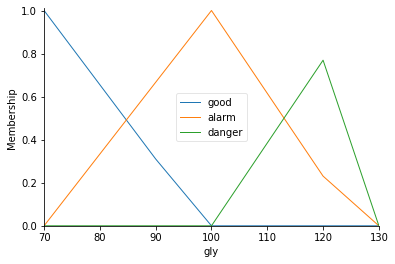

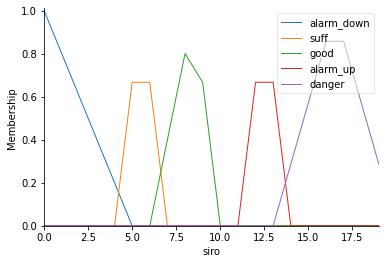

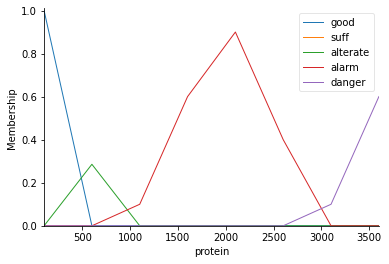

In [10]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
glycaemia = ctrl.Antecedent(np.arange(70,140,10),'gly')
sirolimus = ctrl.Antecedent(np.arange(0,20,1),'siro')
proteinuria = ctrl.Consequent(np.arange(100,4000,500),'protein')

glycaemia['good']=fuzz.trimf(glycaemia.universe,[70,70,99])
glycaemia['alarm']=fuzz.trimf(glycaemia.universe,[70,100,126])
glycaemia['danger']=fuzz.trimf(glycaemia.universe,[100,126,126])

sirolimus['alarm_down']=fuzz.trimf(sirolimus.universe,[0,0,5])
sirolimus['suff']=fuzz.trimf(sirolimus.universe,[4,5.5,7])
sirolimus['good']=fuzz.trimf(sirolimus.universe,[6,8.5,10])
sirolimus['alarm_up']=fuzz.trimf(sirolimus.universe,[11,12.5,14])
sirolimus['danger']=fuzz.trimf(sirolimus.universe,[13,16.5,20])



proteinuria['good']=fuzz.trimf(proteinuria.universe,[100,100,150])
proteinuria['suff']=fuzz.trimf(proteinuria.universe,[150,300,500])
proteinuria['alterate']=fuzz.trimf(proteinuria.universe,[500,850,1000])
proteinuria['alarm']=fuzz.trimf(proteinuria.universe,[1000,2000,3000])
proteinuria['danger']=fuzz.trimf(proteinuria.universe,[3000,4000,5000])

glycaemia.view()
sirolimus.view()
proteinuria.view()
